In [2]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
import argparse
import os

(376, 300, 3)


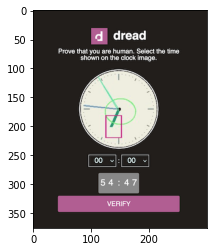

In [3]:
img = cv2.imread('CAPTCHAs_data/1.jpeg')
print(img.shape)
plt.imshow(img)

In [4]:
def resize(img): 
    print('Original Dimensions : ',img.shape)
    scale_percent = (200/img.shape[1]) # percent of original size
    width = int(img.shape[1] * scale_percent)
    height = int(img.shape[0] * scale_percent)
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    print('Resized Dimensions : ',resized.shape)
    return resized


In [28]:
path = '/Users/dalyapraz/Desktop/IUPhD/B657 Computer Vision/CAPTCHA project/CAPTCHAs_data'
# grab list of files from the directory
jpeg_files = [f for f in os.listdir(path) if f.endswith('.jpeg')]
for file in jpeg_files:
    img = cv2.imread('CAPTCHAs_data/'+file)
    img = resize(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # detect circles in the image
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.9, 100, minRadius = int(img.shape[1]/5),\
                               maxRadius = int(img.shape[1]/2) )
    #output = img.copy()
    # Create mask
    height,width, dim = img.shape
    mask = np.zeros((height,width, dim), np.uint8)

    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        print('circles found:', len(circles ))
        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            center = (x,y)
            # creating luminous image and crop the detected circle
            cv2.circle(mask,(x, y), r,(255,255,255),thickness=-1)
            # apply mask to image with the detected area inside the circle
            output = cv2.bitwise_and(img, mask)

            # Define lower and uppper limits of what we call "brown"
            lo=np.array([0,0,0])
            hi=np.array([0,0,0])
            
            # Mask image to only select brown
            mask=cv2.inRange(output,lo,hi)
            
            # Change image to red where we found brown
            output[mask>0]=(255,255,255)
            break
        # show the output image
        output = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
        #wide = cv2.Canny(output, 10, 200)
        #mid = cv2.Canny(output, 30, 150)
        #tight = cv2.Canny(output, 240, 250)
        #plt.imshow(np.hstack([gray, tight]))
        binary = cv2.threshold(output, 200, 255, cv2.THRESH_BINARY)[1]
        binary = cv2.bitwise_not(binary)
        linesP = cv2.HoughLinesP(binary, rho=1,theta=np.pi/60, threshold=15, minLineLength=15, maxLineGap=3)
        if linesP is not None:
            for i in range(0, len(linesP)):
                l = linesP[i][0]
                #if (l[0] in range(center[0]-5, center[0]+6) and l[1] in range(center[1]-5, center[1]+6)) or \
                #        (l[2] in range(center[0]-5, center[0]+6) and l[3] in range(center[1]-5, center[1]+6)):
                print(l, center)
                cv2.line(mask, (l[0], l[1]), (l[2], l[3]), (255,255,255), 1, cv2.LINE_AA)
        cv2.circle(mask,center, 2,(255,255,255),thickness=-1)            
        final = cv2.bitwise_not(mask)
        cv2.imshow("output", np.hstack([gray, binary, final]))
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        cv2.waitKey(1)
        #plt.imshow(np.hstack([img, output]))
        approve = input("Approve? (y/n)")
        if approve != 'y':
            print('this image has a problem: ',file)
            break
    else:
        print('No circles found: ', file)

Original Dimensions :  (1066, 838, 3)
Resized Dimensions :  (254, 200, 3)
circles found: 1
[ 94 110 138 106] (96, 111)
[ 74 117  89 118] (96, 111)
[ 95 112 119 124] (96, 111)
[ 63 100 106 114] (96, 111)
[105 123 137 123] (96, 111)
[ 63  99  96 126] (96, 111)
[105 124 136 124] (96, 111)
[ 96 125  96 109] (96, 111)
[ 95 111 138 107] (96, 111)
[103 106 121 106] (96, 111)
[103  94 106 122] (96, 111)
Approve? (y/n)y
Original Dimensions :  (1044, 776, 3)
Resized Dimensions :  (269, 199, 3)
circles found: 1
[100 112 122 161] (102, 115)
[ 97 165 128 117] (102, 115)
[ 56 137  80 161] (102, 115)
[102 112 110  91] (102, 115)
[118 163 146 140] (102, 115)
[100 114 128 118] (102, 115)
[ 87 124  87  97] (102, 115)
[143  85 153 115] (102, 115)
[ 89  89  94 105] (102, 115)
[ 94 165 126 160] (102, 115)
[ 90 117  95  97] (102, 115)
[148 102 151 129] (102, 115)
[104 132 105 154] (102, 115)
[140 144 152 121] (102, 115)
[115  66 142  84] (102, 115)
[ 86 124  86  97] (102, 115)
[103 141 103 115] (102, 115)
[